In [1]:
import requests
from whoop import WhoopClient

In [2]:
USERNAME = ""
PASSWORD = ""

In [3]:
client = WhoopClient(USERNAME, PASSWORD)

In [20]:
start_date = "2023-07-01"
end_date = "2023-09-01" 

In [21]:
test = client.get_cycle_collection(start_date=start_date, end_date=end_date)

In [6]:
import polars as pl
import duckdb

In [92]:
# t = pl.LazyFrame(test)
t = pl.DataFrame(test)

In [23]:
t.select(pl.col("score")).schema

{'score': Struct([Field('strain', Float64), Field('kilojoule', Float64), Field('average_heart_rate', Int64), Field('max_heart_rate', Int64)])}

In [93]:
df = t.unnest(['score'])

In [94]:
df = df.drop_nulls(subset="end")

In [26]:
import seaborn as sns
from datetime import datetime, timedelta, date

In [62]:
df.schema

{'id': Int64,
 'user_id': Int64,
 'created_at': Utf8,
 'updated_at': Utf8,
 'start': Utf8,
 'end': Utf8,
 'timezone_offset': Utf8,
 'score_state': Utf8,
 'strain': Float64,
 'kilojoule': Float64,
 'average_heart_rate': Int64,
 'max_heart_rate': Int64}

In [96]:
df= (
    df.with_columns(pl.col("end").str.strptime(pl.Datetime).cast(pl.Datetime))
)

In [97]:
df = (
    df.with_columns(pl.col("end").dt.strftime("%m").alias("month"))
)

In [48]:
df.columns

['id',
 'user_id',
 'created_at',
 'updated_at',
 'start',
 'end',
 'timezone_offset',
 'score_state',
 'strain',
 'kilojoule',
 'average_heart_rate',
 'max_heart_rate',
 'month']

In [98]:
df.head()

id,user_id,created_at,updated_at,start,end,timezone_offset,score_state,strain,kilojoule,average_heart_rate,max_heart_rate,month
i64,i64,str,str,str,datetime[μs],str,str,f64,f64,i64,i64,str
421389003,1571812,"""2023-09-01T14:…","""2023-09-02T15:…","""2023-09-01T07:…",2023-09-02 06:00:40.688,"""-05:00""","""SCORED""",11.093324,9877.63,76,165,"""09"""
420864728,1571812,"""2023-08-31T13:…","""2023-09-01T14:…","""2023-08-31T04:…",2023-09-01 07:10:47.154,"""-05:00""","""SCORED""",15.574284,14093.894,77,170,"""09"""
420351869,1571812,"""2023-08-30T13:…","""2023-08-31T13:…","""2023-08-30T05:…",2023-08-31 04:52:48.059,"""-05:00""","""SCORED""",13.711004,11733.574,78,147,"""08"""
419899410,1571812,"""2023-08-29T16:…","""2023-08-30T13:…","""2023-08-29T03:…",2023-08-30 05:39:46.669,"""-05:00""","""SCORED""",13.674633,12898.788,74,153,"""08"""
419208726,1571812,"""2023-08-28T11:…","""2023-08-29T16:…","""2023-08-28T05:…",2023-08-29 03:20:49.854,"""-05:00""","""SCORED""",11.531476,9984.857,72,142,"""08"""


c:\Users\Tim\Projects\whoop_analysis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Tim\Projects\whoop_analysis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Tim\Projects\whoop_analysis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Tim\Projects\whoop_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to Na

<Axes: xlabel='start', ylabel='average_heart_rate'>

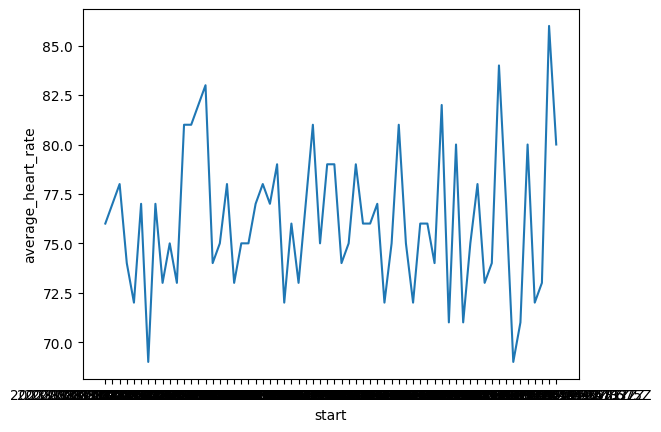

In [100]:
sns.lineplot(data=df,x="start", y="average_heart_rate")

c:\Users\Tim\Projects\whoop_analysis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Tim\Projects\whoop_analysis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Tim\Projects\whoop_analysis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Tim\Projects\whoop_analysis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

<Axes: xlabel='average_heart_rate', ylabel='Count'>

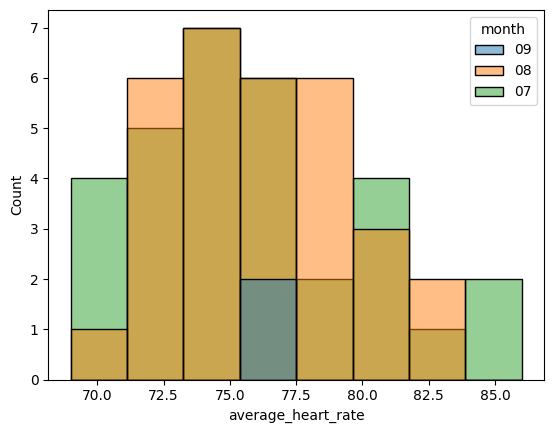

In [101]:
sns.histplot(data=df,x="average_heart_rate", hue="month")